In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,10)}
        )

### Read the data and check for completeness and errors

In [13]:
url_1 = 'https://disk.yandex.ru/d/iSVP1sZ7AdW7TQ'
url_2 = 'https://disk.yandex.ru/d/jmJxR8yhwCXlaw'
url_3 = 'https://disk.yandex.ru/d/DYd4M5b_8RETsA'
url_4 = 'https://disk.yandex.ru/d/lqHnH8NOZ458iw'

key = 'https://getfile.dokpub.com/yandex/get/'

assessments         = pd.read_csv(key+url_1)
courses             = pd.read_csv(key+url_2)
student_assessment   = pd.read_csv(key+url_3)
student_registration = pd.read_csv(key+url_4)

In [14]:
assessments.head()

# code_module       - course identification code
# code_presentation - semester (ID code)
# id_assessment     - test (ID number of the assessment)
# assessment_type   - test type. There are three types of assessment: 
                    # instructor-mandated assessment (TMA), 
                    # computer-based assessment (CMA), 
                    # course exam (Exam)
# date              - information about the final date of the test. Calculated as the number of days since the start of the semester. The semester start date has the number 0 (zero).
# weight            - the weight of the test in % of the course grade. Normally, exams are considered separately and are weighted 100%; the sum of all other grades is 100%.

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [15]:
# assessments.shape
# assessments.dtypes
# assessments.describe()
# assessments.nunique()
# assessments.isna().sum()

In [16]:
# Looking at the blank values for the due date, we see that they all relate to exams
assessments[assessments.date.isna()]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [17]:
round(assessments[assessments.date.isna()].shape[0] 
      / assessments[assessments.assessment_type == 'Exam'].shape[0] 
      * 100, 1)

45.8

We see that almost half of the dates for the exams are blank, just taking note for now

In [18]:
courses.head()

# code_module                — subject (identification code)
# code_presentation          — semester (identification code)
# module_presentation_length — semester duration in days

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [19]:
# courses.shape
# courses.dtypes
# courses.describe()
# courses.isna().sum()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


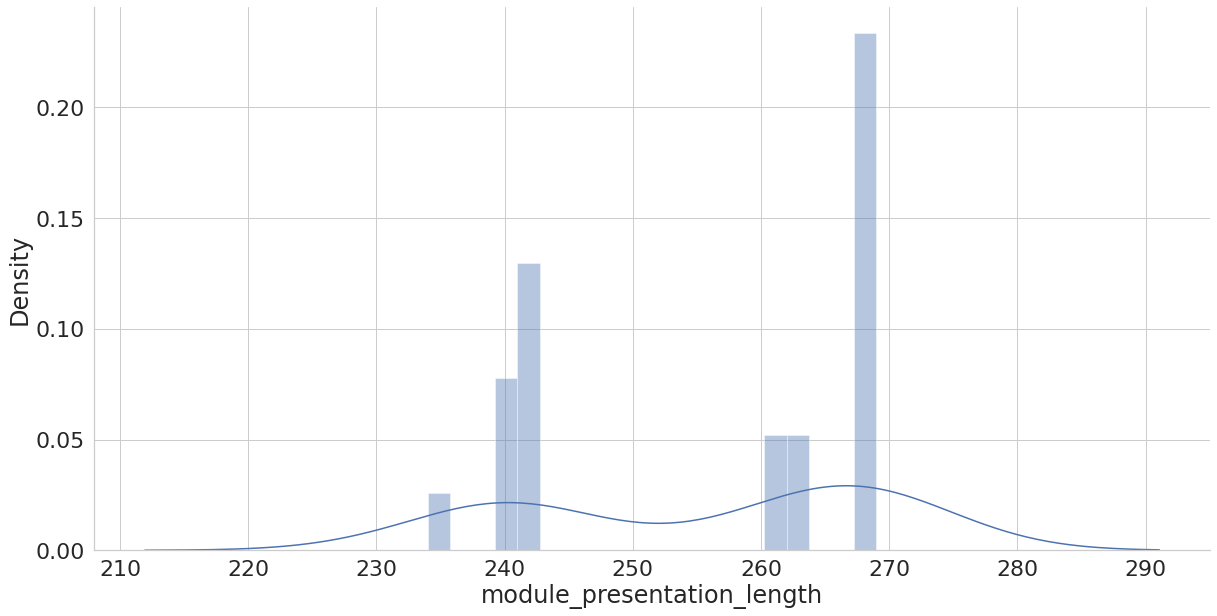

In [20]:
sns.distplot(courses.module_presentation_length, bins=20)
sns.despine()

In [21]:
courses.groupby('code_presentation').mean()

,module_presentation_length
code_presentation,
2013B,240.000000
2013J,265.666667
2014B,239.833333
2014J,267.000000


Looking at the distribution of semester lengths, we see that they can be divided into 2 types: B and J. This may be useful when defining courses

In [22]:
student_assessment.head()

# id_assessment  — test (identification number)
# id_student     — student identification number
# date_submitted — the date the student took the test, measured as the number of days since the beginning of the semester
# is_banked      — the fact of retaking a test from the previous semester (sometimes courses are retaken by students returning from a leave of absence)
# score          — the student's score on this test. The range is from 0 to 100. A score below 40 is a failure/failure to pass the test.

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [23]:
# student_assessment.shape
# student_assessment.dtypes
# student_assessment.describe()
# student_assessment.isna().sum() 

In [24]:
# student_assessment[student_assessment.score.isna()].head(20)
student_assessment[student_assessment.score.isna()].nunique()

id_assessment      78
id_student        160
date_submitted    117
is_banked           2
score               0
dtype: int64

We looked at the empty values in the score, there are no obvious regularities in their appearance, considering that the empty values occupy less than 0.1% of the whole sample, it may be an error, but we do not discard them yet, we will see later in the jojointed table.

In [25]:
student_assessment.query('date_submitted < 0')

,id_assessment,id_student,date_submitted,is_banked,score
1641,1758,603861,-1,1,61.0
1685,1758,1970390,-1,1,78.0
1690,1758,2073016,-1,1,60.0
1693,1758,2139353,-1,1,65.0
1708,1758,2358969,-1,1,68.0
...,...,...,...,...,...
172516,37440,624767,-1,1,100.0
172526,37440,631446,-1,1,100.0
172717,37441,624767,-1,1,100.0
172727,37441,631446,-1,1,100.0


In [26]:
(student_assessment.query('date_submitted < 0').shape[0]
- student_assessment.query('date_submitted < 0 and is_banked == 1').shape[0])

148

148 values from date_submitted are negative and at the same time these tests are not retaken, you need to look in more detail in the deathdate table

In [27]:
student_registration.head()

# code_module         — subject (identification code)
# code_presentation   — semester (идентификационный код)
# id_student          — student identification number
# date_registration   — student registration date. This is the number of days measured from the beginning of the semester (e.g., a negative value of -30 means that the student registered for the course 30 days before the start of the semester).
# date_unregistration — is the date of de-registration of the student from the course. For students who have completed the course, this field remains empty.

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [28]:
# student_registration.shape
# student_registration.dtypes
# student_registration.describe()
student_registration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [29]:
# student_registration[student_registration.date_registration.isna()]
student_registration[student_registration.date_registration.isna()].nunique()

code_module             5
code_presentation       4
id_student             43
date_registration       0
date_unregistration    35
dtype: int64

The situation is similar to the score, we do not see any obvious regularities in the appearance of empty values, they occupy 0.14% of the entire sample, perhaps this is an error, but we do not reject it yet, let's first look at the jojointed table

### Start processing data and preparing it for analysis

Let's try to define a course by looking for combinations among courses, semesters, exams, student registrations, and other indicators. My initial hypothesis is that a course is a set of courses that runs over several semesters and in which a relatively fixed group of students participate throughout the period. In parallel, let's look at the validity of the data given the inputs in the assignment

In [30]:
# Starting with df with grades and tests, let's see how many tests there were for each course in the semester
assessments_by_module = assessments.groupby(['code_module', 'code_presentation', 'assessment_type']) \
                                   .agg({'id_assessment':'count'}) \
                                   .reset_index()

assessments_by_module = assessments_by_module.pivot(index = ['code_module', 'assessment_type'], 
                                                    columns = 'code_presentation', 
                                                    values = 'id_assessment')
assessments_by_module

code_presentation            2013B  2013J  2014B  2014J
code_module assessment_type                            
AAA         Exam               NaN    1.0    NaN    1.0
            TMA                NaN    5.0    NaN    5.0
BBB         CMA                5.0    5.0    5.0    NaN
            Exam               1.0    1.0    1.0    1.0
            TMA                6.0    6.0    6.0    5.0
CCC         CMA                NaN    NaN    4.0    4.0
            Exam               NaN    NaN    2.0    2.0
            TMA                NaN    NaN    4.0    4.0
DDD         CMA                7.0    NaN    NaN    NaN
            Exam               1.0    1.0    1.0    1.0
            TMA                6.0    6.0    6.0    6.0
EEE         Exam               NaN    1.0    1.0    1.0
            TMA                NaN    4.0    4.0    4.0
FFF         CMA                7.0    7.0    7.0    7.0
            Exam               1.0    1.0    1.0    1.0
            TMA                5.0    5.0    5.0    5.0
GGG         CMA                NaN    6.0    6.0    6.0
            Exam               NaN    1.0    1.0    1.0
            TMA                NaN    3.0    3.0    3.0

It is not possible to explicitly combine the obtained results in several courses, so we dig further. We can also see that for BBB course the values in semester 2014J differ from the others, let's check why

In [31]:
assessments.query('code_module == "BBB"')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
12,BBB,2013B,14991,CMA,54.0,1.0
13,BBB,2013B,14992,CMA,89.0,1.0
14,BBB,2013B,14993,CMA,124.0,1.0
15,BBB,2013B,14994,CMA,159.0,1.0
16,BBB,2013B,14995,CMA,187.0,1.0
17,BBB,2013B,14984,TMA,19.0,5.0
18,BBB,2013B,14985,TMA,47.0,18.0
19,BBB,2013B,14986,TMA,89.0,18.0
20,BBB,2013B,14987,TMA,124.0,18.0
21,BBB,2013B,14988,TMA,159.0,18.0


We see that in semester 2014J for BBB we changed the specifics of the test, and the sum of all weights is 100, so there is no error. We also see that in semester 2014J we have a test with weight 0, it makes sense to check how many such tests there are in total

In [32]:
assessments.query('weight == 0').shape
# Since zero values are more than 25% of the total number of exams, 
# let's see which subjects have the most such values

assessments.groupby('code_module') \
           .agg({'weight': 'count'}) \
           .reset_index() \
           .merge(assessments.query('weight == 0') \
                             .groupby('code_module') \
                             .agg({'weight': 'count'}) \
                             .reset_index(),
                  how = 'left',
                  on  = 'code_module'
                 )

,code_module,weight_x,weight_y
0,AAA,12,NaN
1,BBB,42,1.0
2,CCC,20,NaN
3,DDD,35,NaN
4,EEE,15,NaN
5,FFF,52,28.0
6,GGG,30,27.0


There are a significant number of zero tests in FFF and GGG subjects, so let's check if the condition that the sum of all weights for each subject and semester should equal 100 works for them (we exclude exams, as they should not fall into this sum).

In [33]:
assessments.query('assessment_type != "Exam"') \
           .groupby(['code_module', 'code_presentation']) \
           .agg({'weight': 'sum'})

weight
code_module code_presentation        
AAA         2013J               100.0
            2014J               100.0
BBB         2013B               100.0
            2013J               100.0
            2014B               100.0
            2014J               100.0
CCC         2014B               100.0
            2014J               100.0
DDD         2013B               100.0
            2013J               100.0
            2014B               100.0
            2014J               100.0
EEE         2013J               100.0
            2014B               100.0
            2014J               100.0
FFF         2013B               100.0
            2013J               100.0
            2014B               100.0
            2014J               100.0
GGG         2013J                 0.0
            2014B                 0.0
            2014J                 0.0

There's something wrong with GGG, so let's keep looking.

In [34]:
assessments.query('assessment_type != "Exam" and code_module == "GGG"')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
176,GGG,2013J,37418,CMA,229.0,0.0
177,GGG,2013J,37419,CMA,229.0,0.0
178,GGG,2013J,37420,CMA,229.0,0.0
179,GGG,2013J,37421,CMA,229.0,0.0
180,GGG,2013J,37422,CMA,229.0,0.0
181,GGG,2013J,37423,CMA,229.0,0.0
182,GGG,2013J,37415,TMA,61.0,0.0
183,GGG,2013J,37416,TMA,124.0,0.0
184,GGG,2013J,37417,TMA,173.0,0.0
186,GGG,2014B,37428,CMA,222.0,0.0


No conclusion can be drawn on GGG at this stage, let's look at it in the final table. Perhaps it is an assumption of this course (and partly of FFF) that the final grade is affected by the grades of other exams.

Back to finding the course definition, let's look at the specifics of the exams

In [35]:
assessments_exams = assessments.query('assessment_type == "Exam"') \
                               .groupby(['code_module', 'code_presentation']) \
                               .agg({'id_assessment':'count'}) \
                               .reset_index()

assessments_exams.pivot(index   = 'code_module', 
                        columns = 'code_presentation', 
                        values  = 'id_assessment'
                       )

code_presentation,2013B,2013J,2014B,2014J
code_module,,,,
AAA,NaN,1.0,NaN,1.0
BBB,1.0,1.0,1.0,1.0
CCC,NaN,NaN,2.0,2.0
DDD,1.0,1.0,1.0,1.0
EEE,NaN,1.0,1.0,1.0
FFF,1.0,1.0,1.0,1.0
GGG,NaN,1.0,1.0,1.0


There are no particular patterns, but there is a problem with the CCC exams, the number of them is different from the others

In [ ]:
CCC_double_list = assessments.query('code_module == "CCC" and assessment_type == "Exam"').id_assessment.tolist()
CCC_double_list
# You can't see the cause right away, so let's pull out the test numbers to look at via student_assessment

In [37]:
student_assessment.query('id_assessment in @CCC_double_list').id_assessment.unique()

array([24290, 24299])

There are no results for exams 40087 and 40088, so they will be dropped from the final df

Let's look at student_registration, maybe we can use it to define a course 

In [38]:
students_by_module = student_registration.groupby(['code_module', 'code_presentation']) \
                                         .agg({'id_student': 'count'}) \
                                         .reset_index()

students_by_module = students_by_module.pivot(
                                              index = 'code_module', 
                                              columns = 'code_presentation', 
                                              values = 'id_student'
                                             )
students_by_module

code_presentation,2013B,2013J,2014B,2014J
code_module,,,,
AAA,NaN,383.0,NaN,365.0
BBB,1767.0,2237.0,1613.0,2292.0
CCC,NaN,NaN,1936.0,2498.0
DDD,1303.0,1938.0,1228.0,1803.0
EEE,NaN,1052.0,694.0,1188.0
FFF,1614.0,2283.0,1500.0,2365.0
GGG,NaN,952.0,833.0,749.0


It can be seen that in some semesters the number of students increased/decreased by n, let's try to verify it

In [39]:
students_by_module_min = students_by_module.min(axis=1)
# Very roughly rounded
round(students_by_module.divide(students_by_module_min, axis=0) * 2)

code_presentation,2013B,2013J,2014B,2014J
code_module,,,,
AAA,NaN,2.0,NaN,2.0
BBB,2.0,3.0,2.0,3.0
CCC,NaN,NaN,2.0,3.0
DDD,2.0,3.0,2.0,3.0
EEE,NaN,3.0,2.0,3.0
FFF,2.0,3.0,2.0,3.0
GGG,NaN,3.0,2.0,2.0


The distribution is similar in structure to the previous assessments_by_module only without grouping by assessment_type. Let's compare them visually

In [40]:
assessments_by_module = assessments.groupby(['code_module', 'code_presentation']) \
                                   .agg({'id_assessment':'count'}) \
                                   .reset_index()

assessments_by_module = assessments_by_module.pivot(index = 'code_module', 
                                                    columns = 'code_presentation', 
                                                    values = 'id_assessment')

assessments_by_module_min = assessments_by_module.min(axis=1)
assessments_by_module.divide(assessments_by_module_min, axis=0)

code_presentation,2013B,2013J,2014B,2014J
code_module,,,,
AAA,NaN,1.0,NaN,1.0
BBB,2.0,2.0,2.0,1.0
CCC,NaN,NaN,1.0,1.0
DDD,2.0,1.0,1.0,1.0
EEE,NaN,1.0,1.0,1.0
FFF,1.0,1.0,1.0,1.0
GGG,NaN,1.0,1.0,1.0


The distributions are similar but not the same, so the idea of looking for courses by students and assessments also falls away

Optional at this point, let's look at the distribution of student enrollment

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


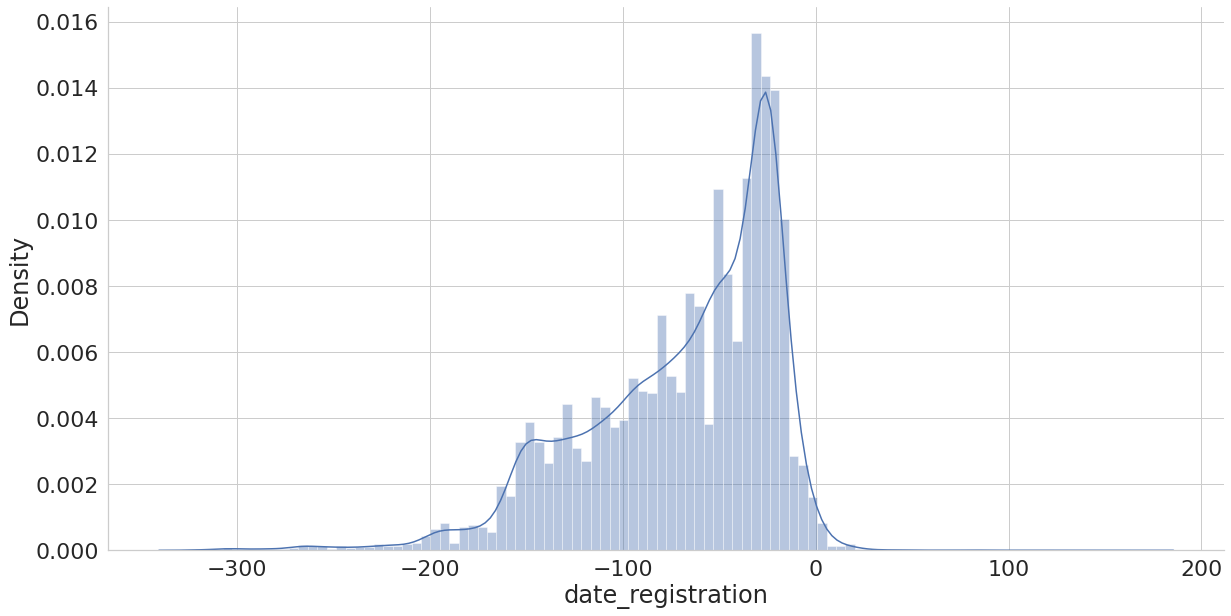

In [41]:
sns.distplot(student_registration.date_registration, bins=100)
sns.despine()

The distribution is pretty much expected, but it was surprising how much some people register in advance

#### A search for a course definition through combinations within the source tables did not lead to any conclusion, so we assume that a successful course is simply an exam on which we received more than 40 points. Let's put together a common table and try to define a course in a simpler way

In [42]:
all_data = assessments.merge(student_assessment, 
                             on='id_assessment') \
                      .merge(student_registration, 
                             how='left', 
                             on=['code_module', 'code_presentation', 'id_student']) \
                      .merge(courses, 
                             on=['code_module', 'code_presentation'])

all_data

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,date_registration,date_unregistration,module_presentation_length
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0,-159.0,NaN,268
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0,-53.0,NaN,268
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0,-52.0,NaN,268
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0,-176.0,NaN,268
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0,-110.0,NaN,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,37437,TMA,173.0,0.0,652462,172,0,60.0,-115.0,NaN,269
173908,GGG,2014J,37437,TMA,173.0,0.0,652539,176,0,75.0,-85.0,NaN,269
173909,GGG,2014J,37437,TMA,173.0,0.0,653157,187,0,70.0,-46.0,NaN,269
173910,GGG,2014J,37437,TMA,173.0,0.0,653252,171,0,70.0,-78.0,NaN,269


In [43]:
# Then we check all the conclusions we drew earlier
# 1. Almost half of the deadlines for exams are blank
# 2. There are students who have blank values in their grades
# 3. There are students who have blank values in the date of enrollment
# 4. 148 values from date_submitted are negative and yet these tests are not retaken
# 5. There are zero weighted exams on GGG and FFF
# 6. No results for exams 40087 and 40088

In [44]:
# 1. Almost half of the deadlines for exams are blank
# all_data[all_data.date.isna()]
all_data[all_data.date.isna()].shape[0] / all_data[all_data.assessment_type == 'Exam'].shape[0]

0.5777374470659408

Already more than half of the deadlines for exams are empty and the overall table did not make it clearer why. We can't delete these rows because of their weight on other indicators, so we just take note of it

In [45]:
# 2. There are students who have blank values in their grades
# all_data[all_data.score.isna()].agg({'date_unregistration': 'count'})
all_data[all_data.score.isna()].assessment_type.unique()[0]

'TMA'

All empty scores refer to TMA, so removing them critically will not affect further calculations

In [46]:
all_data.dropna(subset=['score'], inplace=True)

In [47]:
# 3. There are students who have blank values in the date of enrollment
all_data[all_data.date_registration.isna()]

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,date_registration,date_unregistration,module_presentation_length
46978,CCC,2014B,24286,CMA,18.0,2.0,575419,20,0,0.0,NaN,-24.0,241
76953,DDD,2013J,25348,TMA,25.0,10.0,550142,-1,1,64.0,NaN,-196.0,261
77551,DDD,2013J,25349,TMA,53.0,12.5,550142,-1,1,68.0,NaN,-196.0,261
78971,DDD,2013J,25350,TMA,88.0,17.5,550142,-1,1,82.0,NaN,-196.0,261
80619,DDD,2013J,25351,TMA,123.0,20.0,550142,-1,1,16.0,NaN,-196.0,261
89561,DDD,2014J,25363,TMA,41.0,10.0,604632,41,0,85.0,NaN,12.0,262
96515,EEE,2013J,30709,TMA,33.0,16.0,2681277,32,0,94.0,NaN,-166.0,268


There are 7 rows left out of the original 45, and all of these students have canceled enrollment, delete these rows

In [48]:
all_data.dropna(subset=['date_registration'], inplace=True)

In [2]:
# 4. 148 values from date_submitted are negative and yet these tests are not retaken

In [50]:
all_data.query('date_submitted < 0 and date_submitted == 0').shape[0]

0

There are no such values left in the final table, the issue is closed

In [51]:
# 5. There are zero-weighted exams on GGG and FFF
all_data.query('weight == 0').shape[0] / all_data.shape[0] * 100

27.041074758823935

Such values are still a large number in the same subject distribution, so we approve the hypothesis that these are subject assumptions and only exam scores affect the final grade 

In [52]:
# 6. No results for exams 40087 and 40088
all_data.query('id_assessment == 40087 or id_assessment == 40088').shape[0]

0

There are no such values left in the final table, the issue is closed

In [53]:
all_data

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,date_registration,date_unregistration,module_presentation_length
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0,-159.0,NaN,268
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0,-53.0,NaN,268
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0,-52.0,NaN,268
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0,-176.0,NaN,268
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0,-110.0,NaN,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,37437,TMA,173.0,0.0,652462,172,0,60.0,-115.0,NaN,269
173908,GGG,2014J,37437,TMA,173.0,0.0,652539,176,0,75.0,-85.0,NaN,269
173909,GGG,2014J,37437,TMA,173.0,0.0,653157,187,0,70.0,-46.0,NaN,269
173910,GGG,2014J,37437,TMA,173.0,0.0,653252,171,0,70.0,-78.0,NaN,269


In [54]:
# Since, successful completion of a course is credit for the course on an exam, 
# let's see which courses and semesters had exams 

all_data.query('assessment_type == "Exam"') \
        .groupby(['code_module', 'code_presentation']) \
        .agg({'id_student': 'count'})

id_student
code_module code_presentation            
CCC         2014B                     747
            2014J                    1168
DDD         2013B                     602
            2013J                     968
            2014B                     524
            2014J                     950

The df has data only for CCC and DDD subjects, so let's find how many students successfully passed these exams

#### We gave the definition of a course above, so what's left to do is filter out exams where the grade is above 40, remove rows where students canceled their registration, and answer the question #1, "How many students successfully completed only one course?"

In [55]:
test_success = all_data.loc[all_data['date_unregistration'].isna(), :]

In [56]:
test_success['successful'] = test_success.score >= 40

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
test_success.query('successful == True and assessment_type == "Exam"') \
            .groupby('id_student') \
            .agg({'successful': 'count'}) \
            .reset_index() \
            .groupby('successful') \
            .agg({'id_student': 'count'}) \
            .query('successful == 1')

,id_student
successful,
1,3802


#### Question №2.
Hardest and easiest exam: find the courses and exams within a course that have the lowest and highest completion rates.

In [58]:
exam_complete = test_success.query('assessment_type == "Exam"') \
                            .groupby(['code_module', 'code_presentation', 'id_assessment'], as_index = False) \
                            .agg({'id_student':'count'}) \
                            .rename(columns = {'id_student': 'exams_count'})

In [59]:
exam_complete['exam_success'] = test_success.query('assessment_type == "Exam" & successful == True') \
                                            .groupby(['code_module', 'code_presentation', 'id_assessment'], as_index = False) \
                                            .agg({'id_student':'count'})['id_student']

In [60]:
exam_complete['completion'] = round(exam_complete.exam_success / exam_complete.exams_count * 100, 1)
exam_complete.sort_values('completion')

,code_module,code_presentation,id_assessment,exams_count,exam_success,completion
2,DDD,2013B,25340,602,504,83.7
1,CCC,2014J,24299,1168,1019,87.2
5,DDD,2014J,25368,950,842,88.6
0,CCC,2014B,24290,747,664,88.9
3,DDD,2013J,25354,967,878,90.8
4,DDD,2014B,25361,524,485,92.6


#### Hardest exam -- 25340 in DDD 2013B course, 83.7% completion rate. <br>
#### Easiest exam -- 25361 in the DDD 2014B course, 92.6% completion rate.

#### 3. For each course, determine the average time to pass the exams (by pass we mean the last successful completion of the exam by the student).

In [61]:
test_success.query('assessment_type == "Exam" & successful == True') \
            .groupby(['code_module', 'id_student']) \
            .agg({'date_submitted': 'max'}) \
            .reset_index() \
            .groupby('code_module') \
            .agg({'date_submitted': 'mean'}) \
            .round()

,date_submitted
code_module,
CCC,239.0
DDD,238.0


### Question №3 Answer: the average turnaround time for a CCC subject -- 239 days, DDD -- 238 days

#### 4. Identify the most popular subjects (TOP-3) by the number of registrations for them. And also the subjects with the highest churn rate (TOP-3).


In [62]:
students_churn_rate = student_registration.groupby('code_module') \
                                          .agg({'date_registration': 'count', 'date_unregistration': 'count'})
students_churn_rate['churn_rate'] = round(students_churn_rate.date_unregistration / students_churn_rate.date_registration * 100, 1)

### Question №4 Answer: 

In [63]:
# Top 3 by registrations
students_churn_rate.sort_values('date_registration', ascending=False).head(3)

,date_registration,date_unregistration,churn_rate
code_module,,,
BBB,7900,2377,30.1
FFF,7751,2380,30.7
DDD,6257,2235,35.7


In [64]:
# Top 3 in churn
students_churn_rate.sort_values('churn_rate', ascending=False).head(3)

,date_registration,date_unregistration,churn_rate
code_module,,,
CCC,4426,1947,44.0
DDD,6257,2235,35.7
FFF,7751,2380,30.7


#### 5. Using pandas, between early 2013 and late 2014, identify the semester with the lowest course completions and the longest average course deadlines.

In [65]:
# Using the lessons learned from past assignments, we compile a table with course completion rates and average course delivery dates

semester_complete = test_success.query('assessment_type == "Exam"') \
                                .groupby('code_presentation', as_index = False) \
                                .agg({'id_student': 'count'}) \
                                .rename(columns = {'id_student': 'exams_count'})

semester_complete['exam_success'] = test_success.query('assessment_type == "Exam" & successful == True') \
                                                .groupby('code_presentation', as_index = False) \
                                                .agg({'id_student':'count'})['id_student']

semester_complete['completion'] = round(semester_complete.exam_success / semester_complete.exams_count * 100, 1)
semester_complete.sort_values('completion')

pass_time = test_success.query('assessment_type == "Exam" & successful == True') \
                        .groupby(['code_presentation', 'id_student']) \
                        .agg({'date_submitted': 'max'}) \
                        .reset_index() \
                        .groupby('code_presentation') \
                        .agg({'date_submitted': 'mean'}) \
                        .round(1) \
                        .rename(columns={'date_submitted': 'avg_pass_time'})

semester_complete = semester_complete.merge(pass_time, on='code_presentation')

semester_complete = semester_complete.drop(columns=['exams_count', 'exam_success'], axis=1)

semester_complete

,code_presentation,completion,avg_pass_time
0,2013B,83.7,230.2
1,2013J,90.8,239.5
2,2014B,90.4,233.0
3,2014J,87.9,243.7


Next, I see 2 options to find the semester with the lowest course completions and the longest average course deadlines

In [66]:
# 1 Option: Rank the 2 indicators and find the semester with the lowest sum of ranks.

semester_complete['completion_rank'] = semester_complete.completion.rank()
semester_complete['avg_pass_time_rank'] = semester_complete.avg_pass_time.rank(ascending=False)

semester_complete['rank_1'] = semester_complete.completion_rank + semester_complete.avg_pass_time_rank

semester_complete.sort_values('rank_1').head(1)


,code_presentation,completion,avg_pass_time,completion_rank,avg_pass_time_rank,rank_1
3,2014J,87.9,243.7,2.0,1.0,3.0


In [67]:
# 2 Option: weight the 2 indicators together and choose the semester by the smaller sum of the differences
# To do this, I decided to multiply the first sample by the result of dividing the std of the second sample by the std of the first, 
# and then compare the sum of the differences within the columns

coef = semester_complete.avg_pass_time.std() / semester_complete.completion.std()

completion_min    = semester_complete.completion.min()
avg_pass_time_max = semester_complete.avg_pass_time.max()

semester_complete['rank_2'] = round((semester_complete.completion - completion_min) * coef 
                                    + avg_pass_time_max - semester_complete.avg_pass_time, 1) 

semester_complete.sort_values('rank_2').head(1)


,code_presentation,completion,avg_pass_time,completion_rank,avg_pass_time_rank,rank_1,rank_2
3,2014J,87.9,243.7,2.0,1.0,3.0,7.9


In any case, 2014J turned out to be such a semester

### Question №5 Answer: semester with the lowest course completions and longest average course completion times -- 2014J

#### 6. RFM-analysis

In [68]:
# Let's put together a table to analyze
RFM = all_data.query('assessment_type == "Exam"')
RFM['successful'] = RFM.score >= 40

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### R - Recency

The average turn-in time relative to the deadline can be used for this metric.

In [69]:
RFM['Recency'] = RFM.module_presentation_length - RFM.date_submitted

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
# Let's take a closer look at the resulting figure
# sns.distplot(RFM.Recency)
# RFM.Recency.describe()
RFM[RFM.Recency < 0]

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,date_registration,date_unregistration,module_presentation_length,successful,Recency
52975,CCC,2014B,24290,Exam,NaN,100.0,577245,243,0,34.0,-25.0,NaN,241,False,-2
53404,CCC,2014B,24290,Exam,NaN,100.0,169380,242,0,78.0,-34.0,NaN,241,True,-1
53661,CCC,2014B,24290,Exam,NaN,100.0,555008,266,0,56.0,-46.0,NaN,241,True,-25
65108,CCC,2014J,24299,Exam,NaN,100.0,555498,285,0,58.0,-129.0,NaN,269,True,-16
74900,DDD,2013B,25340,Exam,240.0,100.0,81351,248,0,0.0,-12.0,NaN,240,False,-8
75194,DDD,2013B,25340,Exam,240.0,100.0,532491,241,0,49.0,-120.0,NaN,240,True,-1
75221,DDD,2013B,25340,Exam,240.0,100.0,538611,241,0,51.0,-82.0,NaN,240,True,-1
75282,DDD,2013B,25340,Exam,240.0,100.0,548535,241,0,60.0,-24.0,NaN,240,True,-1
87510,DDD,2014B,25361,Exam,241.0,100.0,391924,251,0,69.0,-93.0,NaN,241,True,-10
87861,DDD,2014B,25361,Exam,241.0,100.0,631388,242,0,78.0,-15.0,NaN,241,True,-1


R can be categorized into the following groups:<br>
1 - handed in later than the deadline<br>
2,3 - 0.5 quantile (excluding those who passed more than the deadline, although they are few, but it is more correct that they do not affect the distribution of groups 2 and 3)

In [71]:
RFM_analysis = RFM.groupby(['id_student'], as_index = False) \
                  .agg({'Recency': 'median'})

#### F - Frequency

In [72]:
rfm_frequency = RFM.groupby(['id_student'], as_index = False) \
                   .agg({'code_module': 'count', 'score': lambda x: sum(y >= 40 for y in x)}) \
                   .reset_index()
rfm_frequency['Frequency'] = rfm_frequency.score / rfm_frequency.code_module

In [73]:
# It can be divided into the following groups
rfm_frequency.groupby('Frequency').count()

,index,id_student,code_module,score
Frequency,,,,
0.0,536,536,536,536
0.5,28,28,28,28
1.0,4069,4069,4069,4069


In [74]:
RFM_analysis = RFM_analysis.merge(rfm_frequency[['id_student', 'Frequency']], on = 'id_student')

#### M - Monetary

In [75]:
rfm_monetary = RFM.groupby(['id_student'], as_index = False) \
                  .agg({'score': 'mean'}) \
                  .rename(columns = {'score': 'Monetary'}) \
                  .reset_index()

RFM_analysis = RFM_analysis.merge(rfm_monetary[['id_student', 'Monetary']], on = 'id_student')

RFM_analysis

,id_student,Recency,Frequency,Monetary
0,23698,26.0,1.0,80.0
1,24213,5.0,1.0,58.0
2,27116,26.0,1.0,96.0
3,28046,24.0,1.0,40.0
4,28787,26.0,1.0,44.0
...,...,...,...,...
4628,2694886,5.0,1.0,69.0
4629,2694933,10.0,1.0,73.0
4630,2695608,24.0,1.0,73.0
4631,2697181,11.0,1.0,80.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


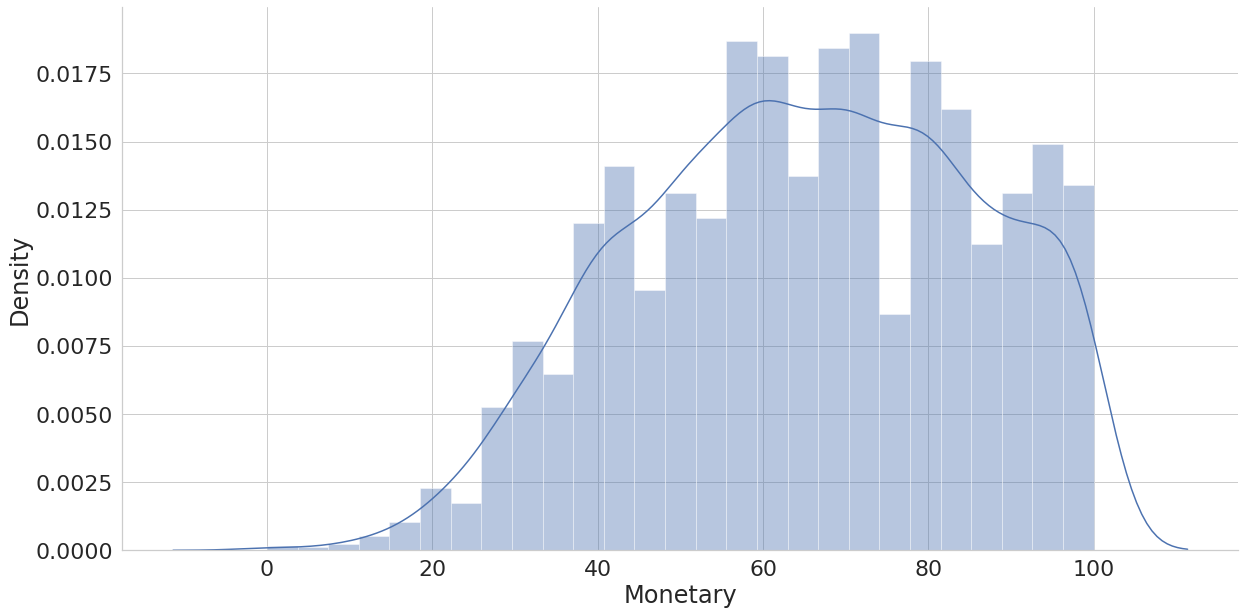

In [76]:
sns.distplot(RFM_analysis.Monetary)
sns.despine()

Taking into account the distribution Monetary can be divided into groups by quantiles

#### RFM-analysis

As a result, we get the following group division:<br>
<br>
R - Recency <br>
1 - handed in after the deadline <br>
2 - 0.5 quantile <br>
3 - 0.5 quantile <br>
<br>
F - Frequency <br>
1 - didn't pass any exams <br>
2 - passed half the exams <br>
3 - passed all the exams <br>
<br>
F - Monetary <br>
1 - less than 40 points <br>
2 - 0.5 quantile <br>
3 - 0.5 quantile <br>

In [77]:
RFM_analysis

,id_student,Recency,Frequency,Monetary
0,23698,26.0,1.0,80.0
1,24213,5.0,1.0,58.0
2,27116,26.0,1.0,96.0
3,28046,24.0,1.0,40.0
4,28787,26.0,1.0,44.0
...,...,...,...,...
4628,2694886,5.0,1.0,69.0
4629,2694933,10.0,1.0,73.0
4630,2695608,24.0,1.0,73.0
4631,2697181,11.0,1.0,80.0


In [78]:
# Let's define the boundaries in advance
r_median = RFM_analysis[RFM_analysis.Recency > 0].Recency.median()

m_median = RFM_analysis[RFM_analysis.Monetary >= 40].Monetary.median()

In [79]:
def r_counting(i):
    if i < 0:
        return 1
    elif i <= r_median:
        return 2
    else:
        return 3

def f_counting(i):
    if i == 1:
        return 3
    elif i == 0.5:
        return 2
    else:
        return 1


def m_counting(i):
    if i < 40:
        return 1
    elif i <= m_median:
        return 2
    else:
        return 3

In [80]:
RFM_analysis['R'] = RFM_analysis['Recency'].apply(lambda x: r_counting(x))
RFM_analysis['F'] = RFM_analysis['Frequency'].apply(lambda x: f_counting(x))
RFM_analysis['M'] = RFM_analysis['Monetary'].apply(lambda x: m_counting(x))

In [81]:
RFM_analysis

,id_student,Recency,Frequency,Monetary,R,F,M
0,23698,26.0,1.0,80.0,3,3,3
1,24213,5.0,1.0,58.0,2,3,2
2,27116,26.0,1.0,96.0,3,3,3
3,28046,24.0,1.0,40.0,3,3,2
4,28787,26.0,1.0,44.0,3,3,2
...,...,...,...,...,...,...,...
4628,2694886,5.0,1.0,69.0,2,3,2
4629,2694933,10.0,1.0,73.0,2,3,3
4630,2695608,24.0,1.0,73.0,3,3,3
4631,2697181,11.0,1.0,80.0,2,3,3


In [82]:
RFM_analysis['RFM_full'] = RFM_analysis.R.apply(str) + RFM_analysis.F.apply(str) + RFM_analysis.M.apply(str)

In [83]:
RFM_visualisation = RFM_analysis.groupby('RFM_full') \
                                .agg({'id_student':'count'}) \
                                .reset_index() \
                                .sort_values('RFM_full', ascending=False)

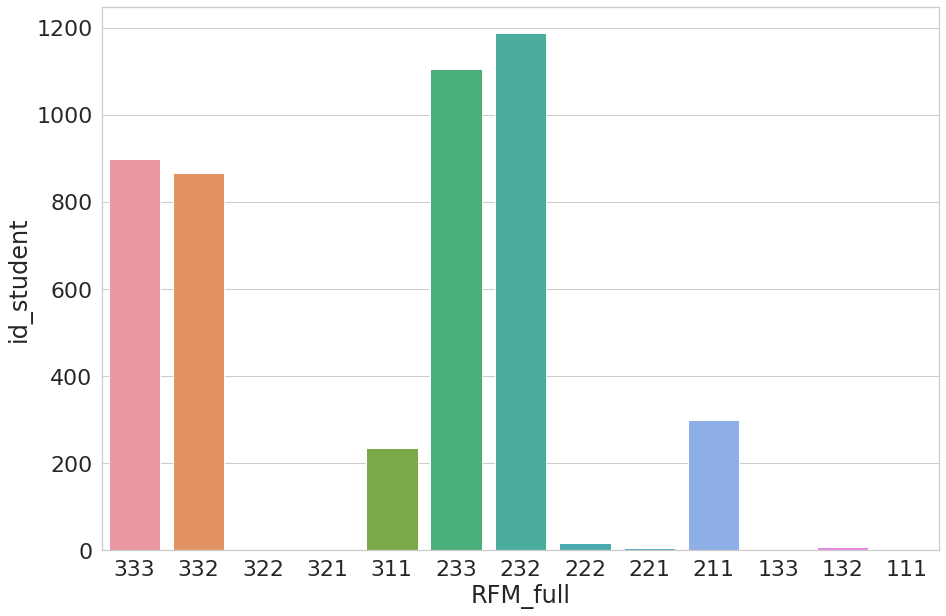

In [84]:
plt.subplots(1, figsize=(15, 10))
sns.barplot(data=RFM_visualisation, x='RFM_full', y='id_student')

### Question №6 Answer:

As a result, we see that the bulk of the students passed all the exams, but they procrastinated.<br>
The second weighty group are the students who also turned everything in, but also turned it in quickly.<br>

As a kind of reflection, I would like to note that in my interpretation this analysis turned out to be not super informative and, perhaps, the segmentation could be done better so that, first, the groups were more evenly distributed, and second, the empty groups were not more than 1.